# How to train a Perceptron

Perceptron is a fundamental building block for neural networks. Let us try to
train a single perceptron. Consider the data given in the following table. As one
can see, it has two attributes x1,x2 and a class label (either 0 or 1).
1. Implement the perceptron training rule and get the appropriate parameters for
a single perceptron.
2. Plot the data points and the obtained decision boundary.
3. Also draw the schematic diagram of the trained perceptron with learned
weights. You can draw this on paper and attach a photo.

In [1]:
#import the required libraries 
import numpy as np   #For numerical operations 
import pandas as pd  #For dataframe handling


import matplotlib.pyplot as plt #Data Visualization
%matplotlib inline

#library to split the data into test & train
from sklearn.model_selection import train_test_split

In [2]:
#Read the data from PDF image into dataframe 
#Given image has X1, X2 dataset. Output class given as Y

d = {'X1': [2,4,11,4,12,5,6,6,2,4,13,1,6,10,8,2], 'X2': [3,5,11,11,5,2,1,3,10,7,8,6,9,12,3,8],
     'Y':[0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1]}

#Get the dataset into dataframe
df = pd.DataFrame(data=d)

#Get top 5 sample rows
df.head()

,X1,X2,Y
0,2,3,0
1,4,5,0
2,11,11,1
3,4,11,1
4,12,5,0


In [3]:
#Get the input dataset into X
X = df.iloc[:, :2] #Excluding 2nd col

#Get the output dataset into Y
Y=  df.iloc[:,2] #Include only 2nd col


In [4]:
#Define the activation function
def activation_func(value):    
    return (1/(1+np.exp(-value))) #Sigmoid
            
#Define the function to train the perceptron 
#Input :
    #Input dataset : in_data
    #Output Labels : labels
    #Learning Rate : alpha
    #Initialized Weights: weights
def perceptron_train(in_data,labels,alpha,weights,bias):
    X=np.array(in_data) #Get into data into X array
    y=np.array(labels)  #Get labels into y array
    original=weights #Get the copy of original weights 
    for key in range(X.shape[0]): #Traverse the into dataset 
        yn=0 #Initialize observed value as 0
        a=activation_func(np.matmul(np.transpose(weights),X[key])+bias) #call activation function on transpose of weights & input training data
        if a > 0.5: #Check output of activation function with output as 1
            yn=1 #If output is greater than threshold, assign observed values as 1
        if (yn != y[key]):
            #print ("Updating Weights for misclassified data")
            weights=weights+alpha*(yn-y[key])*X[key] #updates the new weights with alpha as learning rate , y[key]: Actual, yn:Observed : X[key]: Actual 
            bias = bias + alpha * (yn-y[key])
            #print('Iteration Weights:'+str(key)+': '+str(weights)) #Print the iteration number and the new weights
            #print('Iteration Bias:'+str(key)+': '+str(bias)) #Print the iteration number and the new weights
    diff = weights-original
    #print('Difference: '+str(diff)) #After complete loop, get the difference between initialized and new weights
    return weights,bias #Return the new weights 

In [5]:
#Main function to train the perceptron 
import decimal
alpha=0.0005 # Learning rate 
num_epochs = 1 #Number of Epochs 
weights=np.array([0.3, 0.5]) #Initialized weights
bias = 1.7 #Initialized Bias
for i in range (num_epochs):
    weights,bias=perceptron_train(X,Y,alpha,weights,bias) #Calling training function to get new updated weights & bias
 #Print the new weights 
print ("Calculated Weights from single perceptron: ")
print ("Bias     : ", round(bias,3)) #Bias with roundoff to 3 decimal digits 
print ("Weight 1 : ", round(weights[0],3)) #First weight with roundoff to 3 decimal digits 
print ("Weight 2 : ", round(weights[1],3)) #Second weight with roundoff to 3 decimal digits 

Calculated Weights from single perceptron: 
Bias     :  1.704
Weight 1 :  0.328
Weight 2 :  0.515


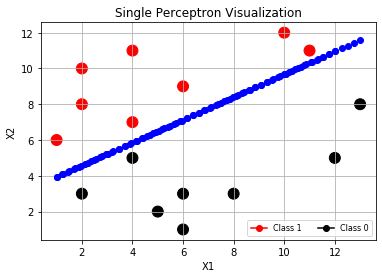

In [6]:
#Plot the decision boundary 
plt.figure(figsize=(6,4)) #Define the size of the visualization window
plt.grid(True) #Define the grid shape
plt.xlabel("X1") #Title for X axis
plt.ylabel("X2") #Title for Y axis

plt.title("Single Perceptron Visualization") #Visualization title
colors = np.where(df.Y > 0, 'r', 'k') #define the color set based on Y column , red if > 0 else black
lo = plt.Line2D(range(10), range(10), marker='o', color='r') #define the legends for red color
ll = plt.Line2D(range(10), range(10), marker='o', color='k') #define the legend for black color
plt.scatter(x=df.X1, y=df.X2,s=120,c=colors) #plot the scatter plot for X1 & X2
for i in np.linspace(np.amin(X),np.amax(X)): #loop thru input dataset for plotting decision boundary 
    slope = (bias/weights[1])/(bias/weights[0])  #calculate the slope using calculated weights & bias
    intercept = bias/weights[1] #calculate intercept based on the weights & bias
    y = (slope*i) + intercept #get the points using y = mx +c where m is the slope, c as intercept
    plt.plot(i, y,'bo') #plot the points into the defined window
    #Set the legends for class 0 & class 1
    plt.legend((lo, ll),
           ('Class 1', 'Class 0'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show() #show the plot